In [37]:
import numpy as np
import pandas as pd
  

In [38]:
# Loading iris
df = pd.read_csv('./data/UCI_heart.csv')
# df.head()
# print(df.describe())
# #data preprocessing
# df['Species'] = pd.Categorical(df['Species'])  # convert Species column to categorical data type

In [39]:
features = ["trestbps", "chol","thalach","exang"]

df = df.dropna() # drops NaN values 
print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists
#df = pd.get_dummies(df, columns=["Age_Quantile"])
# Splitting the dataset
attr = df[features]
target = df['Heart_problem']  # target variable
attr.head()
# target.head()

Empty DataFrame
Columns: [age, sex, trestbps, chol, fbs, restecg, thalach, exang, Heart_problem, Age_Quantile]
Index: []


,trestbps,chol,thalach,exang
0,145,233,150,0
1,160,286,108,1
2,120,229,129,1
3,130,250,187,0
4,130,204,172,0


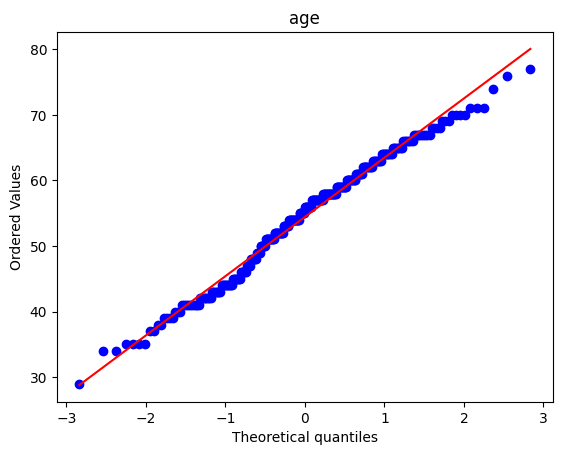

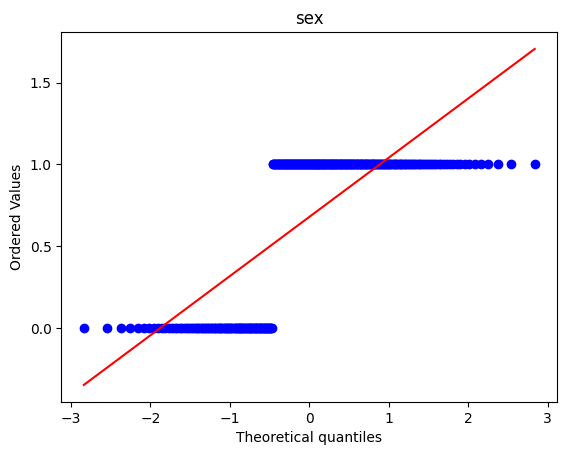

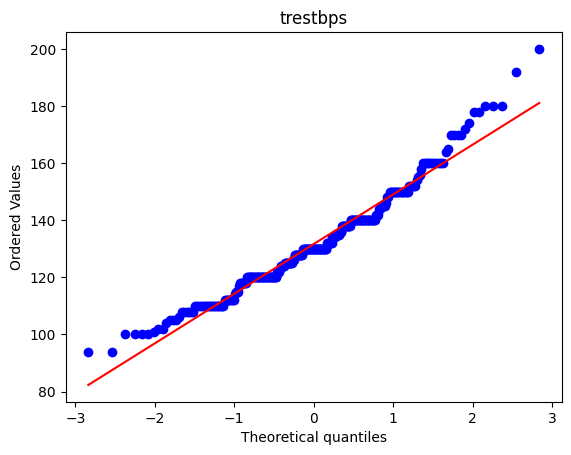

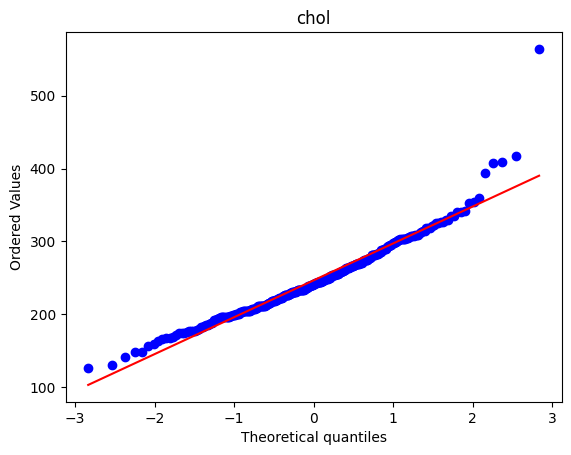

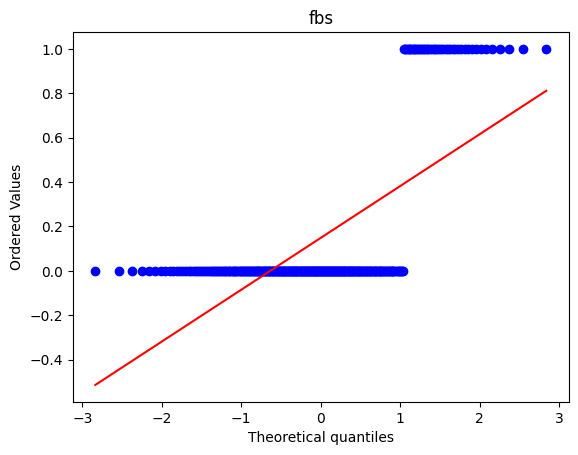

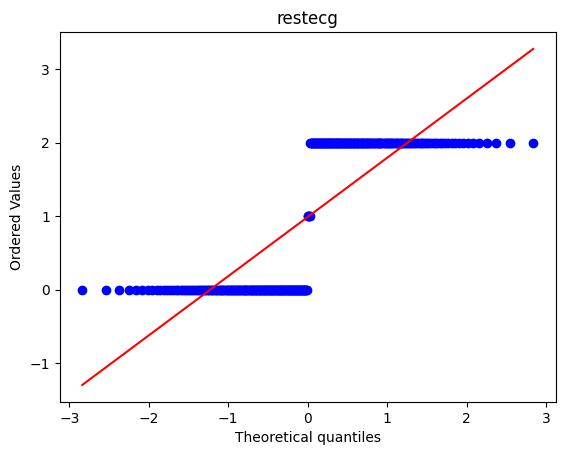

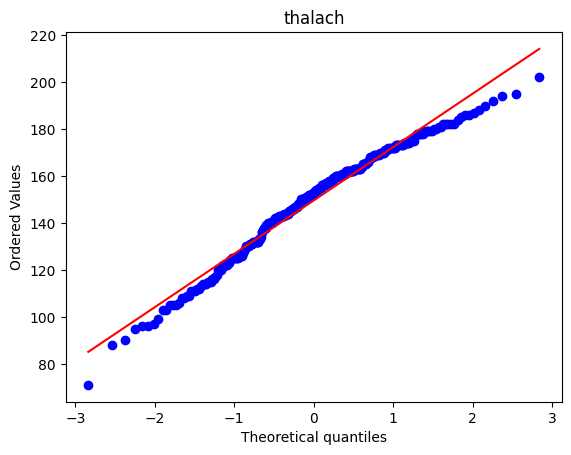

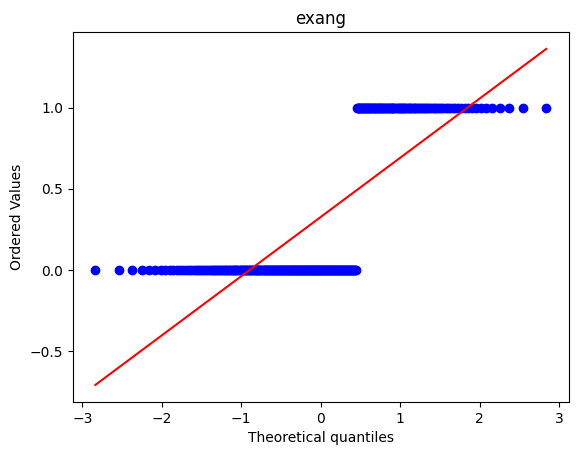

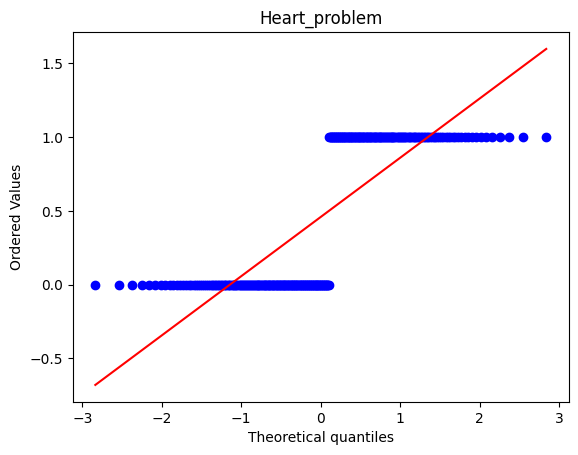

Skipping non-numeric column: Age_Quantile


In [40]:
import matplotlib.pyplot as plt   
import scipy.stats as stats
import pylab 

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        stats.probplot(df[col], dist="norm", plot=pylab)
        pylab.title(col)
        pylab.show()
    else:
        print(f"Skipping non-numeric column: {col}")


In [41]:
target.head()

0    0
1    1
2    1
3    0
4    0
Name: Heart_problem, dtype: int64

In [42]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()

,trestbps,chol,thalach,exang
0,0.481132,0.244292,0.603053,0.0
1,0.622642,0.365297,0.282443,1.0
2,0.245283,0.235160,0.442748,1.0
3,0.339623,0.283105,0.885496,0.0
4,0.339623,0.178082,0.770992,0.0


In [43]:
from sklearn.cluster import AgglomerativeClustering

groups = AgglomerativeClustering(n_clusters=2, metric='euclidean',linkage='average')

clusters=groups.fit_predict(attr)

In [44]:
import pandas as pd
df_cluster=pd.DataFrame({'Actual':target,'Cluster':clusters})
# Create a cross-tabulation
cross_tab = pd.crosstab(df_cluster['Actual'], df_cluster['Cluster'])

print(cross_tab)


Cluster    0   1
Actual          
0        141  23
1         63  76
